In [314]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from IPython.display import IFrame
import random
from thefuzz import fuzz
from thefuzz import process

/Users/dmitrir./opt/anaconda3/lib/python3.9/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Scrapping

In [223]:
url = "https://www.billboard.com/charts/hot-100/#"
response = requests.get(url)
response.status_code

200

In [213]:
soup = BeautifulSoup(response.content, "html.parser")

In [224]:
# find all containers with the information needed
containers = soup.find_all('div', class_='o-chart-results-list-row-container')

# get the information from each container
artists = []
songs = []
for container in containers:
    artists.append(container.find('h3').find_next('span').text.strip())
    songs.append(container.find('h3').text.strip())

# make a dataframe 
df = pd.DataFrame({'artist': artists, 'song': songs})

## Recommender

In [ ]:
df['artist_song'] = df['artist'].str.cat(df['song'], sep=': ')
df['artist_song'] = df['artist_song'].apply(lambda x:x.lower())
df

In [320]:
def get_audio_feature(input_):
    find_a_song = sp.search(input_, limit=1, market="GB")
    song_features_dict_df = pd.DataFrame(sp.audio_features(find_a_song["tracks"]["items"][0]["id"]))
    song_features_dict_df = song_features_dict_df.drop(['key', 'mode', 'type', 'uri', 'track_href', 'analysis_url', 'time_signature', 'id'], axis=1)
    return song_features_dict_df

In [321]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [ ]:
# original
user_input = input("Check if song is hot: ").lower()

if df['artist_song'].str.contains(user_input).any():
    random_number = np.random.randint(len(df))
    pick_random = df.artist_song[random_number].title()
    print(f'Your song is hot, here is another one! {pick_random}')
    
else:
    # get the audio feature by running a function, calling user_input
    song_features_dict_df = get_audio_feature(user_input)
    # transform them
    song_features_scaled = scaler.transform(song_features_dict_df)
    song_features_scaled_df = pd.DataFrame(song_features_scaled, columns = song_features_dict_df.columns)
    # predict
    cluster = kmeans.predict(song_features_scaled_df)
    cluster = cluster[0]
    # recommend it
     # get random song
    random_song_with_same_cluster = X[(X['cluster'] == cluster)].sample(n=1)
     # get the id of this song
    id_random_song = str(random_song_with_same_cluster['id'].values[0])
    # play it
    print('Your song is not hot, but here is another nice one!')
    display(play_song(id_random_song))

In [390]:
# original 2
user_input = input("Check if song is hot: ").lower()

random_number = np.random.randint(len(df))
# pick_random = df.artist_song[random_number].title()

pick_random = random.choice(df['song'].tolist())

closest_match = process.extractOne(user_input, df['song'])
artist = df.loc[df['song'] == pick_random,'artist'].item()

result=sp.search(q=pick_random+artist,limit=1,market="GB")



if df['artist_song'].str.contains(user_input).any():
    print(f'Your song is hot, here is another one! {pick_random}')
    
    
if df['artist_song'].str.contains(user_input).any()==False:
    print('Opps!, your input is not the Hot List! Did you mean:',closest_match[0],"by", df.loc[df['song'] == closest_match[0],'artist'].item(),"?")
    a = input("Input Y or N:")
else df['artist_song'].str.contains(user_input).any():
    print("OK! You might also like:", pick_random ,"by", artist)
    song_id=result["tracks"]["items"][0]["id"]

else:
    # get the audio feature by running a function, calling user_input
    song_features_dict_df = get_audio_feature(user_input)
    # transform them
    song_features_scaled = scaler.transform(song_features_dict_df)
    song_features_scaled_df = pd.DataFrame(song_features_scaled, columns = song_features_dict_df.columns)
    # predict
    cluster = kmeans.predict(song_features_scaled_df)
    cluster = cluster[0]
    # recommend it
     # get random song
    random_song_with_same_cluster = X[(X['cluster'] == cluster)].sample(n=1)
     # get the id of this song
    id_random_song = str(random_song_with_same_cluster['id'].values[0])
    # play it
    display(play_song(id_random_song))

SyntaxError: invalid syntax (2370043212.py, line 27)

In [ ]:
# test
import re
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import random
import pandas as pd



playing_now = input ('Which name of the song are you listening to? ''').lower()
random_hot = random.choice(hot_songs['title'].tolist())#hot_songs['title'].sample().item() or hot_songs['title'].sample().item()
x = playing_now
y = random_hot
artist = hot_songs.loc[hot_songs['title'] == y,'artist'].item()
closest_match = process.extractOne(x, hot_songs['title'])
result=sp.search(q=y+artist,limit=1,market="GB")
#find_asong = sp.search(x, limit=1, market="GB")

condition = (hot_songs['title'].str.casefold() == x.lower())

if hot_songs[condition]['title'].any() == True:
    print("Nice!, your input is in the Hot List! You might also like:", y ,"by", hot_songs.loc[hot_songs['title'] == y,'artist'].item())

        #if y!=x:
         #   print("Great taste! You might also like:", y ,"by", hot_songs.loc[hot_songs['title'] == y,'artist'].item())
        #else:
         #   c = hot_songs['title'].sample().item()
          #  print("Great taste! You might also like:", c ,"by", hot_songs.loc[hot_songs['title'] == c,'artist'].item())
else:
    print('Opps!, your input is not in not the Hot List! Did you mean:',closest_match[0],"by", hot_songs.loc[hot_songs['title'] == closest_match[0],'artist'].item(),"?")
    a = input("Input Y or N:")
    if a in ["Y","y"]:

        print("OK! You might also like:", y ,"by", artist)
        song_id=result["tracks"]["items"][0]["id"]
else:
        result2=sp.search(q=x,limit=1,market="GB")
        song_id = result2["tracks"]["items"][0]["id"]
        print("Did you mean:",result2["tracks"]["items"][0]["name"],"by",result2["tracks"]["items"][0]["artists"][0]["name"],"?")
        a = input("Input Y or N:")
        if a in ["Y","y"]:

            print("OK! Enjoy:", y ,"by", artist)
            song_id=result["tracks"]["items"][0]["id"]
        else:
            get_audio_feature(x)
            #song_features_dict_df
            # transform them
            song_features_scaled = scaler.transform(song_features_dict_df)
            song_features_scaled_df = pd.DataFrame(song_features_scaled, columns = song_features_dict_df.columns)
            # predict
            cluster = kmeans.predict(song_features_scaled_df)
            cluster = cluster[0]
            # recommend it
             # get random song
            random_song_with_same_cluster = X[(X['cluster'] == cluster)].sample(n=1)
             # get the id of this song
            id_random_song = str(random_song_with_same_cluster['id'].values[0])
            # play it
            play_song(id_random_song)
                    #print("Ohh no! Then enjoy this for now:",result2["tracks"]["items"][0]["name"],"by",result2["tracks"]["items"][0]["artists"][0]["name"],"?")

def play_song(random_song):#function to call play song
                return IFrame(src="https://open.spotify.com/embed/track/%22+random_song,
                   width="320",
                   height="80",
                   frameborder="0",
                   allowtransparency="true",
                   allow="encrypted-media",
                  )
play_song(song_id)

### Get ready to talk api

In [225]:
import spotipy
import json
import config
import pprint as pp

from spotipy.oauth2 import SpotifyClientCredentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

### Get tracks from a playlist

In [226]:
# test 
def get_playlist_tracks(username, playlist_list):
    list_of_results = []
    # loop over the playlist list
    for i in playlist_list:
            results = sp.user_playlist_tracks(username,i,market="GB")
            tracks = results['items']
            while results['next']:
                results = sp.next(results)
                tracks.extend(results['items'])
                list_of_results.append({'playlist_id': i, 'tracks': tracks})
            return list_of_results
    # for each playlist run the code below and add the result to an empty list as a dictionary
    # then we have a list of dictionnairies 

In [ ]:
# test 2
a_list_with_playlists = ['37i9dQZF1DWZ2fb6SBrzTW', '37i9dQZF1DWWuJFsTMqHYX', '37i9dQZF1DWSjibQnF0bUk', '37i9dQZF1DXaCACvgOVs5K', '2JRXnerNyzSs7W7eOpYvU3', '37i9dQZF1DX71VcjjnyaBQ']
get_playlist_tracks('spotify', a_list_with_playlists)

In [6]:
def get_playlist_tracks(username, playlist_id):
    # loop over the playlist list
    # for each playlist run the code below and add the result to an empty list as a dictionary
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return results

In [ ]:
a_list_with_playlists = ['37i9dQZF1DWZ2fb6SBrzTW', '37i9dQZF1DWWuJFsTMqHYX', '37i9dQZF1DWSjibQnF0bUk', '37i9dQZF1DXaCACvgOVs5K', '2JRXnerNyzSs7W7eOpYvU3', '37i9dQZF1DX71VcjjnyaBQ']

In [42]:
tracks = get_playlist_tracks('spotify','37i9dQZF1DX71VcjjnyaBQ')

### Get audio_features

In [43]:
list_of_audio_features=[]
for item in range(0,30):
    list_of_audio_features.append(sp.audio_features(tracks['items'][item]["track"]["id"])[0])

In [44]:
df6=pd.DataFrame(list_of_audio_features)    
df6=df6[["danceability","energy","loudness","speechiness","acousticness",
    "instrumentalness","liveness","valence","tempo","id","duration_ms"]]

In [46]:
df6

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.417,0.0509,-19.939,0.0644,0.966,0.3680,0.1130,0.2890,65.692,2qbPX1fQUyknyc7cZw2L8W,259073
1,0.320,0.1100,-21.339,0.0470,0.926,0.8170,0.0995,0.1690,61.852,7qLzoarYodaUHezJvndAdK,312453
2,0.493,0.3470,-15.713,0.0363,0.906,0.9410,0.1440,0.2840,112.818,56OCZENfcrmeCpufvWZd0P,283999
3,0.748,0.1430,-16.502,0.0460,0.979,0.8790,0.1130,0.4280,126.439,4q4emoW3IX2eHhY3sVkudj,177500
4,0.388,0.3370,-13.437,0.0288,0.252,0.8990,0.1080,0.2090,92.526,7eTxWRSvauWm5L3FblGk2h,298000
5,0.665,0.2480,-13.717,0.0398,0.935,0.8880,0.1030,0.5610,74.023,7sjZIf7J5FQlNQrOQWODai,259787
6,0.407,0.0241,-18.739,0.0347,0.978,0.5650,0.1010,0.1630,110.375,6sJUbzyzNOrAt9dr3pkOPk,672520
7,0.502,0.2880,-12.457,0.0375,0.707,0.9520,0.1200,0.2740,126.728,67gegBlOgrRPHhfLfb3CEj,323520
8,0.543,0.1740,-13.936,0.0347,0.947,0.0615,0.1230,0.0490,110.541,0H7udegVzTRxIYzPXoBvkI,268082
9,0.430,0.1240,-14.140,0.0344,0.956,0.0561,0.1230,0.2240,111.024,069VcK8RjjzhZK3UT3A8ja,340760


In [41]:
df5

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.438,0.805,-6.237,0.0624,0.002550,0.000057,0.0842,0.564,113.253,2aoo2jlRnM3A0NyLQqMN2f,240800
1,0.533,0.905,-5.270,0.0754,0.008760,0.578000,0.0698,0.486,108.900,0wJoRiX5K5BxlqZTolB2LD,170813
2,0.479,0.944,-5.167,0.1150,0.002060,0.028300,0.3560,0.572,153.450,5LI7PoHEolR8plrf3I16sq,163800
3,0.346,0.768,-5.695,0.0377,0.006030,0.380000,0.0244,0.532,169.492,0NWPxcsf5vdjdiFUI8NgkP,210160
4,0.568,0.898,-8.833,0.0862,0.028500,0.078700,0.4840,0.833,110.824,0hnlRgTh80b1emNnM0jmwt,301520
5,0.307,0.756,-8.119,0.0493,0.020900,0.758000,0.3530,0.417,114.843,34jAhU99TNRvYwwOEoINl3,404267
6,0.515,0.534,-8.045,0.0768,0.181000,0.002780,0.0547,0.426,70.776,1Eolhana7nKHYpcYpdVcT5,145747
7,0.599,0.622,-7.019,0.1280,0.222000,0.000000,0.5360,0.907,117.574,1DfWmv1eJU1a9tuGpqKGFP,223680
8,0.319,0.858,-9.913,0.0839,0.003810,0.232000,0.6640,0.471,106.231,7blY9jGplyzTiS2qltyfFe,280267
9,0.364,0.865,-7.328,0.1140,0.247000,0.020900,0.0936,0.554,111.150,0xKcrFF5ed7U4EPdG6vE4f,265587


In [35]:
df4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.660,0.878,-6.647,0.0596,0.212000,0.663000,0.1600,0.2640,129.004,3JsH3qnwhYGs20PBMsCgNx,213800
1,0.716,0.881,-7.027,0.0536,0.000561,0.670000,0.2160,0.2930,123.984,5SfcsMI2nJhdZpmwCcNEGf,220887
2,0.636,0.869,-5.289,0.0412,0.037800,0.044600,0.0808,0.3060,143.011,5eTaQYBE1yrActixMAeLcZ,186496
3,0.925,0.561,-8.675,0.1760,0.065900,0.027100,0.1520,0.7210,128.034,59QDyqLww2pxyg9ijOPO7f,181365
4,0.847,0.690,-7.877,0.0493,0.012700,0.000060,0.0526,0.6920,125.004,4zN21mbAuaD0WqtmaTZZeP,186662
5,0.852,0.988,-6.007,0.0588,0.009510,0.302000,0.0629,0.6700,128.013,6t4VHEcJ7Kek9pgGHlDp6R,181875
6,0.751,0.834,-7.018,0.0713,0.074900,0.000505,0.1490,0.5630,133.972,2K6qq0V7jXSlhucLr8R74Z,175246
7,0.714,0.917,-6.649,0.0869,0.050900,0.823000,0.0725,0.5790,160.057,43OMUa5jouGCZEz9k9vooo,240060
8,0.668,0.723,-9.315,0.0395,0.000646,0.850000,0.2050,0.0322,123.999,0kXPOcMLExBxGeS4YJexzk,325744
9,0.753,0.872,-7.552,0.0478,0.000998,0.291000,0.0774,0.5730,139.996,0Ex4dfzYtS1tgoubw8jLod,241825


In [31]:
df3

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.792,0.503,-8.044,0.0626,0.03690,0.000570,0.0959,0.381,99.970,1rrqJ9QkOBYJlsZgqqwxgB,185093
1,0.828,0.726,-6.389,0.0419,0.10600,0.001010,0.1030,0.670,113.017,3baPniPXS0iEII8rDUJdYP,212976
2,0.788,0.649,-9.674,0.0532,0.25300,0.013600,0.1200,0.229,113.009,2kaH2Z8ezDUKf6fNw250rZ,169912
3,0.727,0.600,-4.799,0.2400,0.63600,0.000005,0.1060,0.754,199.796,7ErtOGQ9DwyQa3lwP77j4u,216000
4,0.826,0.657,-7.779,0.1470,0.20400,0.000014,0.0668,0.860,118.049,0Em4eY10PGyiBlmjWxcav3,168858
5,0.859,0.551,-7.916,0.1490,0.55900,0.000000,0.1940,0.777,102.049,4Gasn91fsCefnN8zM5GjA8,155293
6,0.845,0.700,-8.737,0.0391,0.10000,0.001130,0.0984,0.850,119.997,5V9XFfvCG4WP5ZdISOLvaF,166559
7,0.578,0.631,-7.619,0.2280,0.31400,0.000000,0.1070,0.794,108.783,1tOp1bXhT9tvydSAGDHdQy,169043
8,0.861,0.797,-5.210,0.1100,0.27200,0.006350,0.0870,0.595,100.050,3BwAHuQhZyL4tOkf36DuQv,187275
9,0.838,0.569,-8.414,0.0529,0.19400,0.037700,0.0802,0.630,113.046,6wuMo4ZR83PhlhXhJ1S3VY,190542


In [18]:
df2

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.570,0.225,-17.168,0.0290,0.30600,0.058600,0.0689,0.408,151.780,3c6wivu78aLN7ZXp8UbpaI,429973
1,0.569,0.314,-8.241,0.0579,0.84500,0.000020,0.1200,0.311,179.332,2JlQOgJZdvQ5YJrVxY13wQ,249560
2,0.390,0.582,-9.822,0.0427,0.46600,0.356000,0.2920,0.561,79.633,36huM0UOR9A17TYAape2Xg,301242
3,0.420,0.396,-8.807,0.0314,0.67400,0.004950,0.1030,0.406,70.898,3aPOQ6TdIuAW8m1KZid1Hv,210773
4,0.540,0.254,-14.993,0.0948,0.89500,0.956000,0.1090,0.713,86.958,2PdCpqwqkFbGB0dJXFMsvu,151827
5,0.536,0.427,-13.120,0.0574,0.71400,0.028000,0.1090,0.409,196.034,1QnWVnnt2AOT7psq22mO5I,287999
6,0.702,0.269,-15.172,0.0365,0.62600,0.040600,0.1250,0.397,99.747,05CF4ATpqROLTQVYABNZ3W,386973
7,0.729,0.441,-13.088,0.0374,0.58600,0.240000,0.0930,0.293,124.957,1YQmUOQUxVeHebdKBX6m71,240560
8,0.810,0.465,-13.289,0.0540,0.28200,0.002160,0.0899,0.253,95.133,2LQwuRI1h4Q4qk4HzK9zE2,186347
9,0.361,0.310,-12.102,0.0398,0.80200,0.687000,0.1280,0.408,177.659,56K7H3Ipsce0Csn2v4u8kZ,355840


In [16]:
df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.826,0.657,-7.779,0.1470,0.20400,0.000014,0.0668,0.860,118.049,0Em4eY10PGyiBlmjWxcav3,168858
1,0.845,0.700,-8.737,0.0391,0.10000,0.001130,0.0984,0.850,119.997,5V9XFfvCG4WP5ZdISOLvaF,166559
2,0.578,0.631,-7.619,0.2280,0.31400,0.000000,0.1070,0.794,108.783,1tOp1bXhT9tvydSAGDHdQy,169043
3,0.838,0.569,-8.414,0.0529,0.19400,0.037700,0.0802,0.630,113.046,6wuMo4ZR83PhlhXhJ1S3VY,190542
4,0.843,0.725,-7.282,0.0539,0.16500,0.003570,0.0948,0.556,120.000,5F4OfeowSReF93KcH2eUcG,150000
5,0.819,0.817,-8.221,0.0698,0.05930,0.201000,0.2750,0.770,120.039,5UwxpuGHkwiojKDaPC5ZNu,148000
6,0.920,0.716,-7.104,0.1050,0.29600,0.002220,0.1040,0.961,115.991,4eZZofkV1OQ9GDqAgHqNpA,183103
7,0.806,0.915,-3.102,0.0296,0.17000,0.000000,0.2810,0.967,110.025,4QrZSUg5xCZpFKDIhJMU2Q,196472
8,0.856,0.850,-5.590,0.0549,0.00389,0.002000,0.1150,0.515,118.969,2eknBYpfzA4Mp5zWHMGac5,149244
9,0.735,0.592,-11.208,0.0534,0.06610,0.522000,0.1250,0.603,104.065,3rmqNsOiGqqvFNTmGlzl4R,159426


In [47]:
audio_features_list = []
audio_features_list.extend([df1, df2, df3, df4, df5, df6])
audio_features_list

In [64]:
dima_songs = pd.concat(audio_features_list)

In [68]:
dima_songs

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.826,0.6570,-7.779,0.1470,0.204,0.000014,0.0668,0.860,118.049,0Em4eY10PGyiBlmjWxcav3,168858
1,0.845,0.7000,-8.737,0.0391,0.100,0.001130,0.0984,0.850,119.997,5V9XFfvCG4WP5ZdISOLvaF,166559
2,0.578,0.6310,-7.619,0.2280,0.314,0.000000,0.1070,0.794,108.783,1tOp1bXhT9tvydSAGDHdQy,169043
3,0.838,0.5690,-8.414,0.0529,0.194,0.037700,0.0802,0.630,113.046,6wuMo4ZR83PhlhXhJ1S3VY,190542
4,0.843,0.7250,-7.282,0.0539,0.165,0.003570,0.0948,0.556,120.000,5F4OfeowSReF93KcH2eUcG,150000
...,...,...,...,...,...,...,...,...,...,...,...
25,0.450,0.0944,-26.006,0.0359,0.917,0.866000,0.0958,0.511,88.236,6YDi1zFfIPb5DxYPLKPF3s,333213
26,0.557,0.1730,-16.243,0.0339,0.957,0.929000,0.0904,0.207,62.002,7q6UmBKNhBLgMt0dg9UKr2,347240
27,0.661,0.1550,-20.282,0.0452,0.862,0.867000,0.1220,0.415,132.597,6teUPQnEbgYScxhKjVNcOc,185613
28,0.648,0.2640,-16.183,0.0441,0.826,0.836000,0.1060,0.545,137.367,3wM2sEe8qcWoAZWlXB6pj1,180464


In [65]:
dima_songs.to_csv('dima_songs.csv')

In [69]:
monika_songs = pd.read_csv('monika_songs.csv')

In [70]:
monika_songs

,Unnamed: 0.1,Unnamed: 0,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0,0,0.583,0.02380,-32.244,0.0369,0.994000,0.847,0.1030,0.4260,108.740,5RqKo9P4DLA0bVyY70cWkr,131923
1,1,1,0.296,0.00896,-31.948,0.0394,0.994000,0.910,0.0815,0.0673,69.440,43bSKCMWHIuBsUVmQcDX1J,257000
2,2,2,0.103,0.00526,-29.845,0.0468,0.989000,0.839,0.0997,0.0433,82.597,6a3LTwG4gwiC62EUNff5AD,118853
3,3,3,0.458,0.02590,-27.928,0.0502,0.964000,0.828,0.1080,0.2040,123.716,0scC8HqVaRe04wA0EeAZLp,295547
4,4,4,0.233,0.00786,-31.624,0.0528,0.958000,0.905,0.1060,0.0686,132.011,171fKTIvL8wDal3N6Uv0Bk,262000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,85,85,0.385,0.84000,-6.189,0.0694,0.028100,0.850,0.0826,0.0541,137.958,2iUSC784pwUQSfEHbKhTvd,252174
773,86,86,0.521,0.99400,-6.330,0.0532,0.014600,0.833,0.1870,0.2930,133.008,2rGvg9yjXMQ8B462BOautq,247218
774,87,87,0.324,0.91400,-6.676,0.0731,0.000672,0.773,0.1100,0.0688,140.078,3lyItV83hRQU3WIeGAhTM9,394286
775,88,88,0.579,0.66300,-7.571,0.0647,0.003480,0.753,0.1570,0.1190,142.996,1EIksRgAo1CGkSHkdOLzn7,346187


In [71]:
monika_songs.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [75]:
dima_songs = dima_songs.reset_index()

In [76]:
dima_songs = dima_songs.drop(['index'], axis = 1)

In [78]:
songs_list = pd.concat([dima_songs, monika_songs], ignore_index = True, sort = False)

In [83]:
songs_list

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.826,0.657,-7.779,0.1470,0.204000,0.000014,0.0668,0.8600,118.049,0Em4eY10PGyiBlmjWxcav3,168858
1,0.845,0.700,-8.737,0.0391,0.100000,0.001130,0.0984,0.8500,119.997,5V9XFfvCG4WP5ZdISOLvaF,166559
2,0.578,0.631,-7.619,0.2280,0.314000,0.000000,0.1070,0.7940,108.783,1tOp1bXhT9tvydSAGDHdQy,169043
3,0.838,0.569,-8.414,0.0529,0.194000,0.037700,0.0802,0.6300,113.046,6wuMo4ZR83PhlhXhJ1S3VY,190542
4,0.843,0.725,-7.282,0.0539,0.165000,0.003570,0.0948,0.5560,120.000,5F4OfeowSReF93KcH2eUcG,150000
...,...,...,...,...,...,...,...,...,...,...,...
1032,0.385,0.840,-6.189,0.0694,0.028100,0.850000,0.0826,0.0541,137.958,2iUSC784pwUQSfEHbKhTvd,252174
1033,0.521,0.994,-6.330,0.0532,0.014600,0.833000,0.1870,0.2930,133.008,2rGvg9yjXMQ8B462BOautq,247218
1034,0.324,0.914,-6.676,0.0731,0.000672,0.773000,0.1100,0.0688,140.078,3lyItV83hRQU3WIeGAhTM9,394286
1035,0.579,0.663,-7.571,0.0647,0.003480,0.753000,0.1570,0.1190,142.996,1EIksRgAo1CGkSHkdOLzn7,346187


In [130]:
songs_ids = songs_list['id']

In [131]:
songs_ids

0       0Em4eY10PGyiBlmjWxcav3
1       5V9XFfvCG4WP5ZdISOLvaF
2       1tOp1bXhT9tvydSAGDHdQy
3       6wuMo4ZR83PhlhXhJ1S3VY
4       5F4OfeowSReF93KcH2eUcG
                 ...          
1032    2iUSC784pwUQSfEHbKhTvd
1033    2rGvg9yjXMQ8B462BOautq
1034    3lyItV83hRQU3WIeGAhTM9
1035    1EIksRgAo1CGkSHkdOLzn7
1036    2BfFW4C5SIgbp33539WAah
Name: id, Length: 1037, dtype: object

In [80]:
songs_list.to_csv('songs_list.csv')

In [84]:
# get rid of the id
songs_list_no_id = songs_list.drop(['id'], axis = 1)

In [85]:
songs_list_no_id

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.826,0.657,-7.779,0.1470,0.204000,0.000014,0.0668,0.8600,118.049,168858
1,0.845,0.700,-8.737,0.0391,0.100000,0.001130,0.0984,0.8500,119.997,166559
2,0.578,0.631,-7.619,0.2280,0.314000,0.000000,0.1070,0.7940,108.783,169043
3,0.838,0.569,-8.414,0.0529,0.194000,0.037700,0.0802,0.6300,113.046,190542
4,0.843,0.725,-7.282,0.0539,0.165000,0.003570,0.0948,0.5560,120.000,150000
...,...,...,...,...,...,...,...,...,...,...
1032,0.385,0.840,-6.189,0.0694,0.028100,0.850000,0.0826,0.0541,137.958,252174
1033,0.521,0.994,-6.330,0.0532,0.014600,0.833000,0.1870,0.2930,133.008,247218
1034,0.324,0.914,-6.676,0.0731,0.000672,0.773000,0.1100,0.0688,140.078,394286
1035,0.579,0.663,-7.571,0.0647,0.003480,0.753000,0.1570,0.1190,142.996,346187


In [92]:
# scale
from sklearn.preprocessing import StandardScaler

In [87]:
X = songs_list_no_id

In [112]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.826,0.657,-7.779,0.1470,0.204000,0.000014,0.0668,0.8600,118.049,168858
1,0.845,0.700,-8.737,0.0391,0.100000,0.001130,0.0984,0.8500,119.997,166559
2,0.578,0.631,-7.619,0.2280,0.314000,0.000000,0.1070,0.7940,108.783,169043
3,0.838,0.569,-8.414,0.0529,0.194000,0.037700,0.0802,0.6300,113.046,190542
4,0.843,0.725,-7.282,0.0539,0.165000,0.003570,0.0948,0.5560,120.000,150000
...,...,...,...,...,...,...,...,...,...,...
1032,0.385,0.840,-6.189,0.0694,0.028100,0.850000,0.0826,0.0541,137.958,252174
1033,0.521,0.994,-6.330,0.0532,0.014600,0.833000,0.1870,0.2930,133.008,247218
1034,0.324,0.914,-6.676,0.0731,0.000672,0.773000,0.1100,0.0688,140.078,394286
1035,0.579,0.663,-7.571,0.0647,0.003480,0.753000,0.1570,0.1190,142.996,346187


In [91]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.826,0.657,-7.779,0.1470,0.204,0.000014,0.0668,0.860,118.049,168858
1,0.845,0.700,-8.737,0.0391,0.100,0.001130,0.0984,0.850,119.997,166559
2,0.578,0.631,-7.619,0.2280,0.314,0.000000,0.1070,0.794,108.783,169043
3,0.838,0.569,-8.414,0.0529,0.194,0.037700,0.0802,0.630,113.046,190542
4,0.843,0.725,-7.282,0.0539,0.165,0.003570,0.0948,0.556,120.000,150000


In [113]:
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.094716,0.088947,0.194924,0.484424,-0.195280,-0.632883,-0.796351,1.518579,-0.105966,-0.693898
1,1.190336,0.247068,0.057492,-0.630692,-0.505490,-0.629639,-0.559857,1.480177,-0.036878,-0.721862
2,-0.153383,-0.006661,0.217877,1.321536,0.132828,-0.632922,-0.495494,1.265123,-0.434593,-0.691648
3,1.155108,-0.234649,0.103829,-0.488073,-0.225108,-0.523385,-0.696065,0.635323,-0.283402,-0.430141
4,1.180271,0.338998,0.266222,-0.477738,-0.311609,-0.622550,-0.586799,0.351144,-0.036772,-0.923281
...,...,...,...,...,...,...,...,...,...,...
1032,-1.124686,0.761879,0.423021,-0.317550,-0.719953,1.836744,-0.678104,-1.576275,0.600125,0.319532
1033,-0.440244,1.328172,0.402793,-0.484972,-0.760221,1.787350,0.103225,-0.658840,0.424569,0.259249
1034,-1.431678,1.033994,0.353157,-0.279311,-0.801765,1.613021,-0.473042,-1.519823,0.675313,2.048138
1035,-0.148350,0.111010,0.224763,-0.366123,-0.793389,1.554911,-0.121295,-1.327043,0.778803,1.463077


## Kmeans

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

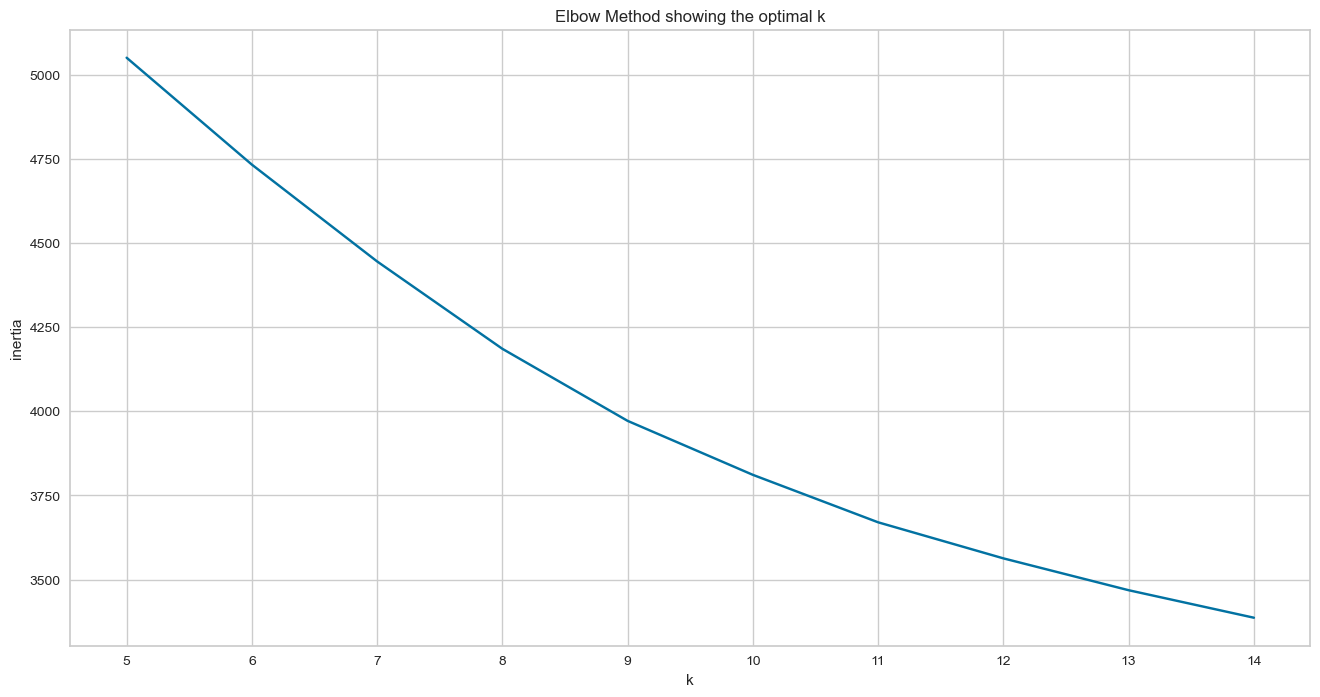

In [115]:
# estimate k - elbow
from sklearn.cluster import KMeans

K = range(5, 15)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

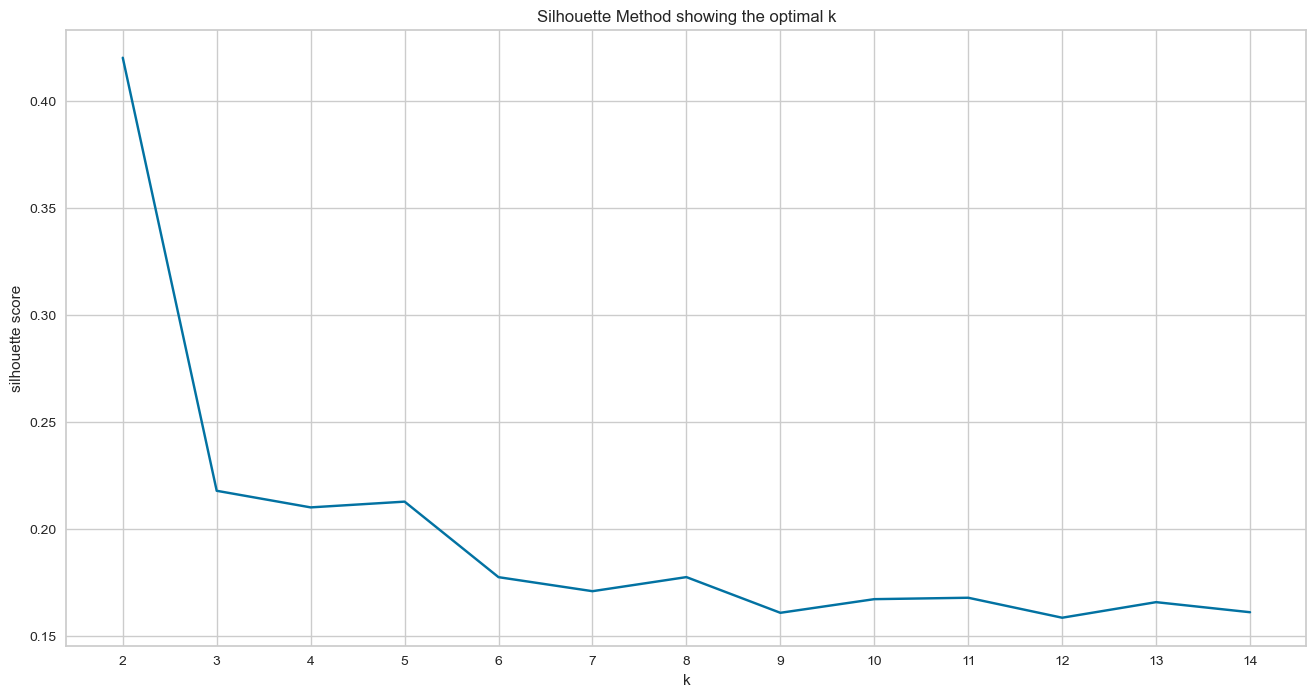

In [116]:
# estimate k - silhoute

K = range(2, 15)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [124]:
# clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=5, random_state=42)

In [125]:
kmeans.labels_

array([3, 3, 1, ..., 4, 4, 0], dtype=int32)

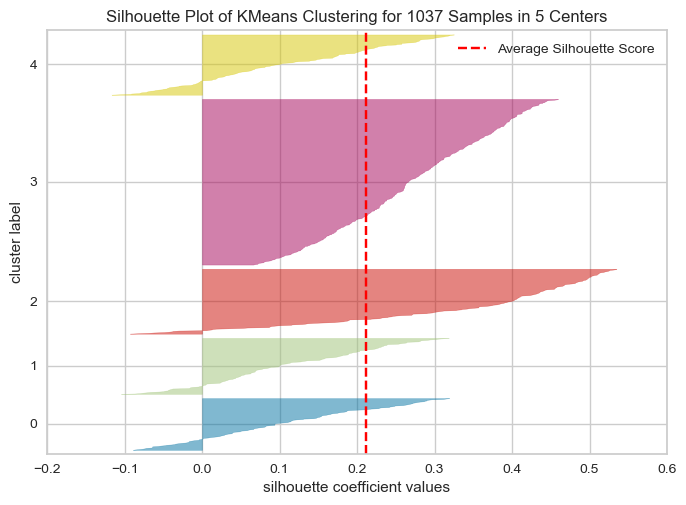

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1037 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [118]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()  

In [203]:
X_scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.094716,0.088947,0.194924,0.484424,-0.195280,-0.632883,-0.796351,1.518579,-0.105966,-0.693898
1,1.190336,0.247068,0.057492,-0.630692,-0.505490,-0.629639,-0.559857,1.480177,-0.036878,-0.721862
2,-0.153383,-0.006661,0.217877,1.321536,0.132828,-0.632922,-0.495494,1.265123,-0.434593,-0.691648
3,1.155108,-0.234649,0.103829,-0.488073,-0.225108,-0.523385,-0.696065,0.635323,-0.283402,-0.430141
4,1.180271,0.338998,0.266222,-0.477738,-0.311609,-0.622550,-0.586799,0.351144,-0.036772,-0.923281
...,...,...,...,...,...,...,...,...,...,...
1032,-1.124686,0.761879,0.423021,-0.317550,-0.719953,1.836744,-0.678104,-1.576275,0.600125,0.319532
1033,-0.440244,1.328172,0.402793,-0.484972,-0.760221,1.787350,0.103225,-0.658840,0.424569,0.259249
1034,-1.431678,1.033994,0.353157,-0.279311,-0.801765,1.613021,-0.473042,-1.519823,0.675313,2.048138
1035,-0.148350,0.111010,0.224763,-0.366123,-0.793389,1.554911,-0.121295,-1.327043,0.778803,1.463077


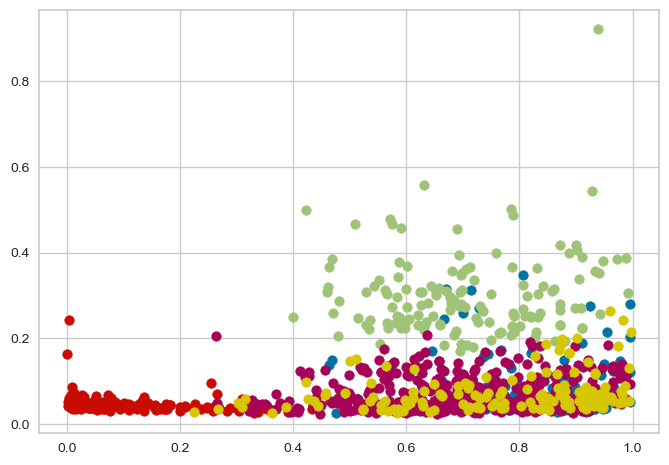

In [119]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [128]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    135
1    146
2    169
3    430
4    157
dtype: int64

In [129]:
X["cluster"] = clusters
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.826,0.657,-7.779,0.1470,0.204000,0.000014,0.0668,0.8600,118.049,168858,3
1,0.845,0.700,-8.737,0.0391,0.100000,0.001130,0.0984,0.8500,119.997,166559,3
2,0.578,0.631,-7.619,0.2280,0.314000,0.000000,0.1070,0.7940,108.783,169043,1
3,0.838,0.569,-8.414,0.0529,0.194000,0.037700,0.0802,0.6300,113.046,190542,3
4,0.843,0.725,-7.282,0.0539,0.165000,0.003570,0.0948,0.5560,120.000,150000,3
...,...,...,...,...,...,...,...,...,...,...,...
1032,0.385,0.840,-6.189,0.0694,0.028100,0.850000,0.0826,0.0541,137.958,252174,4
1033,0.521,0.994,-6.330,0.0532,0.014600,0.833000,0.1870,0.2930,133.008,247218,4
1034,0.324,0.914,-6.676,0.0731,0.000672,0.773000,0.1100,0.0688,140.078,394286,4
1035,0.579,0.663,-7.571,0.0647,0.003480,0.753000,0.1570,0.1190,142.996,346187,4


In [132]:
X["id"] = songs_ids
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,id
0,0.826,0.657,-7.779,0.1470,0.204000,0.000014,0.0668,0.8600,118.049,168858,3,0Em4eY10PGyiBlmjWxcav3
1,0.845,0.700,-8.737,0.0391,0.100000,0.001130,0.0984,0.8500,119.997,166559,3,5V9XFfvCG4WP5ZdISOLvaF
2,0.578,0.631,-7.619,0.2280,0.314000,0.000000,0.1070,0.7940,108.783,169043,1,1tOp1bXhT9tvydSAGDHdQy
3,0.838,0.569,-8.414,0.0529,0.194000,0.037700,0.0802,0.6300,113.046,190542,3,6wuMo4ZR83PhlhXhJ1S3VY
4,0.843,0.725,-7.282,0.0539,0.165000,0.003570,0.0948,0.5560,120.000,150000,3,5F4OfeowSReF93KcH2eUcG
...,...,...,...,...,...,...,...,...,...,...,...,...
1032,0.385,0.840,-6.189,0.0694,0.028100,0.850000,0.0826,0.0541,137.958,252174,4,2iUSC784pwUQSfEHbKhTvd
1033,0.521,0.994,-6.330,0.0532,0.014600,0.833000,0.1870,0.2930,133.008,247218,4,2rGvg9yjXMQ8B462BOautq
1034,0.324,0.914,-6.676,0.0731,0.000672,0.773000,0.1100,0.0688,140.078,394286,4,3lyItV83hRQU3WIeGAhTM9
1035,0.579,0.663,-7.571,0.0647,0.003480,0.753000,0.1570,0.1190,142.996,346187,4,1EIksRgAo1CGkSHkdOLzn7


In [133]:
X.to_csv('X_clusters_ids.csv')